In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mehranehmgh","key":"c2c1365e6432393d8c5dfbe309c0236c"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d matleonard/feature-engineering-data

 97% 189M/196M [00:01<00:00, 125MB/s]
100% 196M/196M [00:01<00:00, 106MB/s]


In [5]:
!unzip '/content/feature-engineering-data.zip' -d '/content/'

Archive:  /content/feature-engineering-data.zip
  inflating: /content/baseline_data.pqt  
  inflating: /content/catboost_encodings.pqt  
  inflating: /content/count_encodings.pqt  
  inflating: /content/downloads.pqt  
  inflating: /content/interactions.pqt  
  inflating: /content/past_6hr_events.pqt  
  inflating: /content/svd_encodings.pqt  
  inflating: /content/time_deltas.pqt  
  inflating: /content/train_sample.csv  


In [64]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot

import os

from imblearn.under_sampling import (RandomUnderSampler,
                                     ClusterCentroids,
                                     NeighbourhoodCleaningRule,
                                     NearMiss,
                                     CondensedNearestNeighbour)

from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.inspection import permutation_importance


from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('/content/train_sample.csv')
df

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,89489,3,1,13,379,2017-11-06 15:13:23,NaN,0
1,204158,35,1,13,21,2017-11-06 15:41:07,2017-11-07 08:17:19,1
2,3437,6,1,13,459,2017-11-06 15:42:32,NaN,0
3,167543,3,1,13,379,2017-11-06 15:56:17,NaN,0
4,147509,3,1,13,379,2017-11-06 15:57:01,NaN,0
...,...,...,...,...,...,...,...,...
2300556,32457,2,1,19,477,2017-11-09 15:59:59,NaN,0
2300557,20266,14,1,13,446,2017-11-09 15:59:59,NaN,0
2300558,49383,12,2,17,178,2017-11-09 16:00:00,NaN,0
2300559,34894,12,1,15,145,2017-11-09 16:00:00,NaN,0


In [ ]:
mask = df.ip == 34894
df[mask]

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
29430,34894,35,1,6,21,2017-11-06 17:07:34,2017-11-06 23:41:44,1
40645,34894,35,1,19,21,2017-11-06 17:53:05,2017-11-06 20:56:41,1
98541,34894,13,1,8,477,2017-11-06 23:38:09,NaN,0
120294,34894,9,1,19,134,2017-11-07 00:15:05,NaN,0
128757,34894,3,1,25,280,2017-11-07 00:26:25,NaN,0
153194,34894,35,1,19,21,2017-11-07 00:58:40,2017-11-07 01:04:47,1
185989,34894,13,1,19,477,2017-11-07 01:43:42,NaN,0
236636,34894,2,1,23,477,2017-11-07 02:55:42,NaN,0
237108,34894,62,1,19,21,2017-11-07 02:56:23,2017-11-07 04:35:07,1
362317,34894,21,2,22,128,2017-11-07 05:53:19,NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300561 entries, 0 to 2300560
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   ip               int64 
 1   app              int64 
 2   device           int64 
 3   os               int64 
 4   channel          int64 
 5   click_time       object
 6   attributed_time  object
 7   is_attributed    int64 
dtypes: int64(6), object(2)
memory usage: 140.4+ MB


In [ ]:
df.isna().sum()

ip                       0
app                      0
device                   0
os                       0
channel                  0
click_time               0
attributed_time    1843715
is_attributed            0
dtype: int64

In [3]:
base_line = pd.read_parquet('/content/baseline_data.pqt')
base_line

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,minute,second
0,27226,3,1,13,120,2017-11-06 15:13:23,None,0,6,15,13,23
1,110007,35,1,13,10,2017-11-06 15:41:07,2017-11-07 08:17:19,1,6,15,41,7
2,1047,6,1,13,157,2017-11-06 15:42:32,None,0,6,15,42,32
3,76270,3,1,13,120,2017-11-06 15:56:17,None,0,6,15,56,17
4,57862,3,1,13,120,2017-11-06 15:57:01,None,0,6,15,57,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2300556,9791,2,1,19,166,2017-11-09 15:59:59,None,0,9,15,59,59
2300557,6240,14,1,13,146,2017-11-09 15:59:59,None,0,9,15,59,59
2300558,15098,12,2,17,50,2017-11-09 16:00:00,None,0,9,16,0,0
2300559,10538,12,1,15,41,2017-11-09 16:00:00,None,0,9,16,0,0


In [9]:
base_line.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2300561 entries, 0 to 2300560
Data columns (total 12 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ip               int64         
 1   app              int64         
 2   device           int64         
 3   os               int64         
 4   channel          int64         
 5   click_time       datetime64[ns]
 6   attributed_time  object        
 7   is_attributed    int64         
 8   day              uint8         
 9   hour             uint8         
 10  minute           uint8         
 11  second           uint8         
dtypes: datetime64[ns](1), int64(6), object(1), uint8(4)
memory usage: 166.7+ MB


In [10]:
base_line.click_time = base_line.click_time.astype('string')

In [ ]:
len(base_line.click_time == df.click_time)

2300561

In [4]:
cb = pd.read_parquet('/content/catboost_encodings.pqt')
cb

,app_cb,device_cb,os_cb,channel_cb
0,0.028329,0.152087,0.138712,0.034049
1,0.995828,0.152087,0.138712,0.950244
2,0.009261,0.152087,0.138712,0.019384
3,0.028329,0.152087,0.138712,0.034049
4,0.028329,0.152087,0.138712,0.034049
...,...,...,...,...
2300556,0.026755,0.152087,0.157243,0.016611
2300557,0.026518,0.152087,0.138712,0.031812
2300558,0.011220,0.026726,0.109914,0.012445
2300559,0.011220,0.152087,0.090235,0.129124


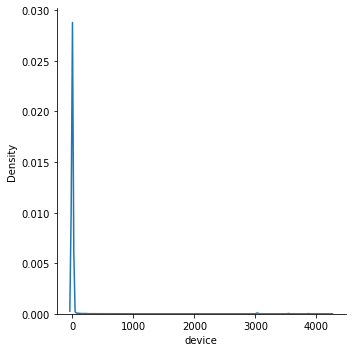

In [16]:
sns.displot(df, x="device", kind="kde")

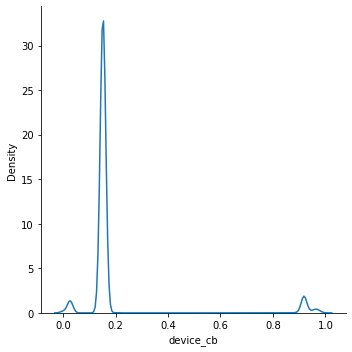

In [17]:
sns.displot(cb, x="device_cb", kind="kde")

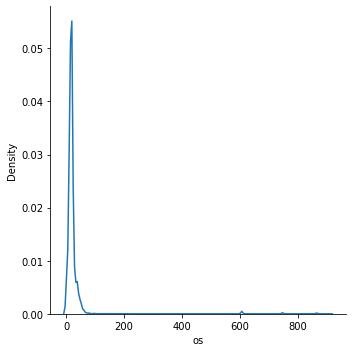

In [18]:
sns.displot(df, x="os", kind="kde")

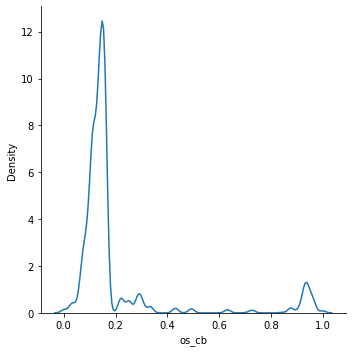

In [19]:
sns.displot(cb, x="os_cb", kind="kde")

In [5]:
count = pd.read_parquet('/content/count_encodings.pqt')
count

,ip_count,app_count,device_count,os_count,channel_count
0,68.0,292254.0,1648091.0,370652.0,26760.0
1,4.0,60114.0,1648091.0,370652.0,41256.0
2,118.0,19564.0,1648091.0,370652.0,31221.0
3,29.0,292254.0,1648091.0,370652.0,26760.0
4,31.0,292254.0,1648091.0,370652.0,26760.0
...,...,...,...,...,...
2300556,190.0,180647.0,1648091.0,420998.0,58224.0
2300557,202.0,81273.0,1648091.0,370652.0,351.0
2300558,413.0,200193.0,62081.0,87078.0,43485.0
2300559,38.0,200193.0,1648091.0,38811.0,29445.0


In [21]:
pd.read_parquet('/content/downloads.pqt')

,previous_downloads
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
2300556,29.0
2300557,14.0
2300558,80.0
2300559,11.0


In [ ]:
pd.read_parquet('/content/interactions.pqt')

,ip_app,ip_device,ip_os,ip_channel,app_device,app_os,app_channel,device_os,device_channel,os_channel
0,492097,219682,496314,681060,3631,4100,675,1229,1890,985
1,40669,14419,39852,57863,3581,3849,625,1229,1867,962
2,19984,6955,19603,28875,4196,5045,787,1229,1928,1018
3,784442,300967,792039,1140313,3631,4100,675,1229,1890,985
4,714088,274929,722619,1041993,3631,4100,675,1229,1890,985
...,...,...,...,...,...,...,...,...,...,...
2300556,869529,331925,876635,1261351,3474,3473,542,1282,1937,2239
2300557,732095,281479,740361,1067079,1177,1191,168,1229,1917,1009
2300558,172291,70732,172020,239696,748,693,96,1590,2565,1936
2300559,22264,7800,21904,32170,744,687,93,1248,1979,1512


In [ ]:
pd.read_parquet('/content/past_6hr_events.pqt')

,ip_past_6hr_counts
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
2300556,23.0
2300557,70.0
2300558,62.0
2300559,9.0


In [ ]:
pd.read_parquet('/content/svd_encodings.pqt')

,device_app_svd_0,device_app_svd_1,device_app_svd_2,device_app_svd_3,device_app_svd_4,os_app_svd_0,os_app_svd_1,os_app_svd_2,os_app_svd_3,os_app_svd_4,channel_app_svd_0,channel_app_svd_1,channel_app_svd_2,channel_app_svd_3,channel_app_svd_4,app_device_svd_0,app_device_svd_1,app_device_svd_2,app_device_svd_3,app_device_svd_4,os_device_svd_0,os_device_svd_1,os_device_svd_2,os_device_svd_3,os_device_svd_4,channel_device_svd_0,channel_device_svd_1,channel_device_svd_2,channel_device_svd_3,channel_device_svd_4,app_os_svd_0,app_os_svd_1,app_os_svd_2,app_os_svd_3,app_os_svd_4,device_os_svd_0,device_os_svd_1,device_os_svd_2,device_os_svd_3,device_os_svd_4,channel_os_svd_0,channel_os_svd_1,channel_os_svd_2,channel_os_svd_3,channel_os_svd_4,app_channel_svd_0,app_channel_svd_1,app_channel_svd_2,app_channel_svd_3,app_channel_svd_4,device_channel_svd_0,device_channel_svd_1,device_channel_svd_2,device_channel_svd_3,device_channel_svd_4,os_channel_svd_0,os_channel_svd_1,os_channel_svd_2,os_channel_svd_3,os_channel_svd_4
0,0.999240,-1.569148e-11,0.034587,-0.017996,0.000058,0.629503,-0.000055,-0.060177,0.099537,0.423755,0.062984,1.115583e-03,0.032671,0.010388,-0.007528,0.609230,-6.188697e-11,-0.163408,-0.343952,0.012265,0.621144,-5.009570e-06,0.247915,-0.001562,-0.000587,0.106036,-0.013216,-0.097800,-0.076666,0.027529,0.603080,-0.000175,0.005957,0.009587,-0.295141,0.999654,-0.000001,-0.026300,0.000119,0.000014,0.105854,-0.017221,0.004707,-0.051656,0.078840,0.998578,-0.001465,-0.018667,-0.004343,-0.014905,0.998937,-0.026614,0.033651,-0.016794,0.001659,0.632548,-0.050790,-0.045754,0.086897,-0.322700
1,0.999240,-1.569148e-11,0.034587,-0.017996,0.000058,0.629503,-0.000055,-0.060177,0.099537,0.423755,0.000002,1.360511e-04,0.000065,0.000019,0.000051,0.129192,-1.201310e-11,-0.245317,-0.240533,0.023868,0.621144,-5.009570e-06,0.247915,-0.001562,-0.000587,0.164086,-0.020319,-0.172538,-0.129126,0.047837,0.156024,-0.000049,-0.164966,-0.262837,0.413561,0.999654,-0.000001,-0.026300,0.000119,0.000014,0.216994,-0.033179,-0.098550,-0.281071,0.528991,0.000001,0.000072,0.000144,0.000017,0.000015,0.998937,-0.026614,0.033651,-0.016794,0.001659,0.632548,-0.050790,-0.045754,0.086897,-0.322700
2,0.999240,-1.569148e-11,0.034587,-0.017996,0.000058,0.629503,-0.000055,-0.060177,0.099537,0.423755,0.000066,1.827373e-04,0.005312,0.000029,-0.001010,0.040313,-3.929517e-12,0.014825,-0.002311,0.001341,0.621144,-5.009570e-06,0.247915,-0.001562,-0.000587,0.003081,-0.000386,-0.002146,-0.001879,0.000693,0.039201,-0.000011,-0.003775,0.043217,-0.126973,0.999654,-0.000001,-0.026300,0.000119,0.000014,0.000867,-0.000188,0.014231,-0.001481,0.000861,0.000008,0.000072,0.000050,0.000186,0.000047,0.998937,-0.026614,0.033651,-0.016794,0.001659,0.632548,-0.050790,-0.045754,0.086897,-0.322700
3,0.999240,-1.569148e-11,0.034587,-0.017996,0.000058,0.629503,-0.000055,-0.060177,0.099537,0.423755,0.062984,1.115583e-03,0.032671,0.010388,-0.007528,0.609230,-6.188697e-11,-0.163408,-0.343952,0.012265,0.621144,-5.009570e-06,0.247915,-0.001562,-0.000587,0.106036,-0.013216,-0.097800,-0.076666,0.027529,0.603080,-0.000175,0.005957,0.009587,-0.295141,0.999654,-0.000001,-0.026300,0.000119,0.000014,0.105854,-0.017221,0.004707,-0.051656,0.078840,0.998578,-0.001465,-0.018667,-0.004343,-0.014905,0.998937,-0.026614,0.033651,-0.016794,0.001659,0.632548,-0.050790,-0.045754,0.086897,-0.322700
4,0.999240,-1.569148e-11,0.034587,-0.017996,0.000058,0.629503,-0.000055,-0.060177,0.099537,0.423755,0.062984,1.115583e-03,0.032671,0.010388,-0.007528,0.609230,-6.188697e-11,-0.163408,-0.343952,0.012265,0.621144,-5.009570e-06,0.247915,-0.001562,-0.000587,0.106036,-0.013216,-0.097800,-0.076666,0.027529,0.603080,-0.000175,0.005957,0.009587,-0.295141,0.999654,-0.000001,-0.026300,0.000119,0.000014,0.105854,-0.017221,0.004707,-0.051656,0.078840,0.998578,-0.001465,-0.018667,-0.004343,-0.014905,0.998937,-0.026614,0.033651,-0.016794,0.001659,0.632548,-0.050790,-0.045754,0.086897,-0.322700
...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
pd.read_parquet('/content/time_deltas.pqt')

,past_events
0,1309.0
1,1309.0
2,1309.0
3,1309.0
4,1309.0
...,...
2300556,2820.0
2300557,22.0
2300558,78.0
2300559,1774.0


In [ ]:
#All Pqt files

df_pqt = pd.read_parquet('/content/baseline_data.pqt')
data_files = ['count_encodings.pqt',
              'catboost_encodings.pqt',
              'interactions.pqt',
              'past_6hr_events.pqt',
              'downloads.pqt',
              'time_deltas.pqt',
              'svd_encodings.pqt']
data_root = '/content/'
for file in data_files:
    features = pd.read_parquet(os.path.join(data_root, file))
    df_pqt = df_pqt.join(features)


In [ ]:
df_pqt

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,minute,second,ip_count,app_count,device_count,os_count,channel_count,app_cb,device_cb,os_cb,channel_cb,ip_app,ip_device,ip_os,ip_channel,app_device,app_os,app_channel,device_os,device_channel,os_channel,ip_past_6hr_counts,previous_downloads,past_events,device_app_svd_0,device_app_svd_1,device_app_svd_2,device_app_svd_3,device_app_svd_4,os_app_svd_0,...,os_device_svd_0,os_device_svd_1,os_device_svd_2,os_device_svd_3,os_device_svd_4,channel_device_svd_0,channel_device_svd_1,channel_device_svd_2,channel_device_svd_3,channel_device_svd_4,app_os_svd_0,app_os_svd_1,app_os_svd_2,app_os_svd_3,app_os_svd_4,device_os_svd_0,device_os_svd_1,device_os_svd_2,device_os_svd_3,device_os_svd_4,channel_os_svd_0,channel_os_svd_1,channel_os_svd_2,channel_os_svd_3,channel_os_svd_4,app_channel_svd_0,app_channel_svd_1,app_channel_svd_2,app_channel_svd_3,app_channel_svd_4,device_channel_svd_0,device_channel_svd_1,device_channel_svd_2,device_channel_svd_3,device_channel_svd_4,os_channel_svd_0,os_channel_svd_1,os_channel_svd_2,os_channel_svd_3,os_channel_svd_4
0,27226,3,1,13,120,2017-11-06 15:13:23,None,0,6,15,13,23,68.0,292254.0,1648091.0,370652.0,26760.0,0.028329,0.152087,0.138712,0.034049,492097,219682,496314,681060,3631,4100,675,1229,1890,985,0.0,1.0,1309.0,0.999240,-1.569148e-11,0.034587,-0.017996,0.000058,0.629503,...,0.621144,-5.009570e-06,0.247915,-0.001562,-0.000587,0.106036,-0.013216,-0.097800,-0.076666,0.027529,0.603080,-0.000175,0.005957,0.009587,-0.295141,0.999654,-0.000001,-0.026300,0.000119,0.000014,0.105854,-0.017221,0.004707,-0.051656,0.078840,0.998578,-0.001465,-0.018667,-0.004343,-0.014905,0.998937,-0.026614,0.033651,-0.016794,0.001659,0.632548,-0.050790,-0.045754,0.086897,-0.322700
1,110007,35,1,13,10,2017-11-06 15:41:07,2017-11-07 08:17:19,1,6,15,41,7,4.0,60114.0,1648091.0,370652.0,41256.0,0.995828,0.152087,0.138712,0.950244,40669,14419,39852,57863,3581,3849,625,1229,1867,962,0.0,1.0,1309.0,0.999240,-1.569148e-11,0.034587,-0.017996,0.000058,0.629503,...,0.621144,-5.009570e-06,0.247915,-0.001562,-0.000587,0.164086,-0.020319,-0.172538,-0.129126,0.047837,0.156024,-0.000049,-0.164966,-0.262837,0.413561,0.999654,-0.000001,-0.026300,0.000119,0.000014,0.216994,-0.033179,-0.098550,-0.281071,0.528991,0.000001,0.000072,0.000144,0.000017,0.000015,0.998937,-0.026614,0.033651,-0.016794,0.001659,0.632548,-0.050790,-0.045754,0.086897,-0.322700
2,1047,6,1,13,157,2017-11-06 15:42:32,None,0,6,15,42,32,118.0,19564.0,1648091.0,370652.0,31221.0,0.009261,0.152087,0.138712,0.019384,19984,6955,19603,28875,4196,5045,787,1229,1928,1018,0.0,1.0,1309.0,0.999240,-1.569148e-11,0.034587,-0.017996,0.000058,0.629503,...,0.621144,-5.009570e-06,0.247915,-0.001562,-0.000587,0.003081,-0.000386,-0.002146,-0.001879,0.000693,0.039201,-0.000011,-0.003775,0.043217,-0.126973,0.999654,-0.000001,-0.026300,0.000119,0.000014,0.000867,-0.000188,0.014231,-0.001481,0.000861,0.000008,0.000072,0.000050,0.000186,0.000047,0.998937,-0.026614,0.033651,-0.016794,0.001659,0.632548,-0.050790,-0.045754,0.086897,-0.322700
3,76270,3,1,13,120,2017-11-06 15:56:17,None,0,6,15,56,17,29.0,292254.0,1648091.0,370652.0,26760.0,0.028329,0.152087,0.138712,0.034049,784442,300967,792039,1140313,3631,4100,675,1229,1890,985,0.0,1.0,1309.0,0.999240,-1.569148e-11,0.034587,-0.017996,0.000058,0.629503,...,0.621144,-5.009570e-06,0.247915,-0.001562,-0.000587,0.106036,-0.013216,-0.097800,-0.076666,0.027529,0.603080,-0.000175,0.005957,0.009587,-0.295141,0.999654,-0.000001,-0.026300,0.000119,0.000014,0.105854,-0.017221,0.004707,-0.051656,0.078840,0.998578,-0.001465,-0.018667,-0.004343,-0.014905,0.998937,-0.026614,0.033651,-0.016794,0.001659,0.632548,-0.050790,-0.045754,0.086897,-0.322700
4,57862,3,1,13,120,2017-11-06 15:57:01,None,0,6,15,57,1,31.0,292254.0,1648091.0,370652.0,26760.0,0.028329,0.152087,0.138712,0.034049,714088,274929,722619,1041993,3631,4100,675,1229,1890,985,0.0,1.0,1309.0,0.999240,-1.569148e-11,0.034587,-0.017996,0.000058,0.

# ADD NEW FEATURES

In [100]:
data = pd.read_csv('/content/train_sample.csv')
data_files = ['past_6hr_events.pqt',
              'downloads.pqt',
              'time_deltas.pqt']
data_root = '/content/'
for file in data_files:
    features = pd.read_parquet(os.path.join(data_root, file))
    data = data.join(features)


In [101]:
data

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,ip_past_6hr_counts,previous_downloads,past_events
0,89489,3,1,13,379,2017-11-06 15:13:23,NaN,0,0.0,1.0,1309.0
1,204158,35,1,13,21,2017-11-06 15:41:07,2017-11-07 08:17:19,1,0.0,1.0,1309.0
2,3437,6,1,13,459,2017-11-06 15:42:32,NaN,0,0.0,1.0,1309.0
3,167543,3,1,13,379,2017-11-06 15:56:17,NaN,0,0.0,1.0,1309.0
4,147509,3,1,13,379,2017-11-06 15:57:01,NaN,0,0.0,1.0,1309.0
...,...,...,...,...,...,...,...,...,...,...,...
2300556,32457,2,1,19,477,2017-11-09 15:59:59,NaN,0,23.0,29.0,2820.0
2300557,20266,14,1,13,446,2017-11-09 15:59:59,NaN,0,70.0,14.0,22.0
2300558,49383,12,2,17,178,2017-11-09 16:00:00,NaN,0,62.0,80.0,78.0
2300559,34894,12,1,15,145,2017-11-09 16:00:00,NaN,0,9.0,11.0,1774.0


In [102]:
data = data.drop(columns=['attributed_time','click_time'])

In [103]:
data['day'] = base_line.day
data['hour'] = base_line.hour
data['minute'] = base_line.minute
data['second'] = base_line.second

In [98]:
data

,ip,app,device,os,channel,is_attributed,ip_past_6hr_counts,previous_downloads,past_events,day,hour,minute,second
0,89489,3,1,13,379,0,0.0,1.0,1309.0,6,15,13,23
1,204158,35,1,13,21,1,0.0,1.0,1309.0,6,15,41,7
2,3437,6,1,13,459,0,0.0,1.0,1309.0,6,15,42,32
3,167543,3,1,13,379,0,0.0,1.0,1309.0,6,15,56,17
4,147509,3,1,13,379,0,0.0,1.0,1309.0,6,15,57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300556,32457,2,1,19,477,0,23.0,29.0,2820.0,9,15,59,59
2300557,20266,14,1,13,446,0,70.0,14.0,22.0,9,15,59,59
2300558,49383,12,2,17,178,0,62.0,80.0,78.0,9,16,0,0
2300559,34894,12,1,15,145,0,9.0,11.0,1774.0,9,16,0,0


## Catboost encoding

In [104]:
data[['app', 'device','os', 'channel']] = cb[['app_cb', 'device_cb','os_cb', 'channel_cb']]

In [56]:
data

,ip,app,device,os,channel,is_attributed,ip_past_6hr_counts,previous_downloads,past_events,day,hour,minute,second
0,89489,0.028329,0.152087,0.138712,0.034049,0,0.0,1.0,1309.0,6,15,13,23
1,204158,0.995828,0.152087,0.138712,0.950244,1,0.0,1.0,1309.0,6,15,41,7
2,3437,0.009261,0.152087,0.138712,0.019384,0,0.0,1.0,1309.0,6,15,42,32
3,167543,0.028329,0.152087,0.138712,0.034049,0,0.0,1.0,1309.0,6,15,56,17
4,147509,0.028329,0.152087,0.138712,0.034049,0,0.0,1.0,1309.0,6,15,57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300556,32457,0.026755,0.152087,0.157243,0.016611,0,23.0,29.0,2820.0,9,15,59,59
2300557,20266,0.026518,0.152087,0.138712,0.031812,0,70.0,14.0,22.0,9,15,59,59
2300558,49383,0.011220,0.026726,0.109914,0.012445,0,62.0,80.0,78.0,9,16,0,0
2300559,34894,0.011220,0.152087,0.090235,0.129124,0,9.0,11.0,1774.0,9,16,0,0


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300561 entries, 0 to 2300560
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ip                  int64  
 1   app                 float64
 2   device              float64
 3   os                  float64
 4   channel             float64
 5   is_attributed       int64  
 6   ip_past_6hr_counts  float64
 7   previous_downloads  float64
 8   past_events         float64
 9   day                 uint8  
 10  hour                uint8  
 11  minute              uint8  
 12  second              uint8  
dtypes: float64(7), int64(2), uint8(4)
memory usage: 166.7 MB


In [58]:
data.isna().sum()

ip                    0
app                   0
device                0
os                    0
channel               0
is_attributed         0
ip_past_6hr_counts    0
previous_downloads    0
past_events           0
day                   0
hour                  0
minute                0
second                0
dtype: int64

In [105]:
data = data.drop(columns=['ip'])

In [ ]:
data

,app,device,os,channel,is_attributed,ip_past_6hr_counts,previous_downloads,past_events,day,hour,minute,second
0,0.028329,0.152087,0.138712,0.034049,0,0.0,1.0,1309.0,6,15,13,23
1,0.995828,0.152087,0.138712,0.950244,1,0.0,1.0,1309.0,6,15,41,7
2,0.009261,0.152087,0.138712,0.019384,0,0.0,1.0,1309.0,6,15,42,32
3,0.028329,0.152087,0.138712,0.034049,0,0.0,1.0,1309.0,6,15,56,17
4,0.028329,0.152087,0.138712,0.034049,0,0.0,1.0,1309.0,6,15,57,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2300556,0.026755,0.152087,0.157243,0.016611,0,23.0,29.0,2820.0,9,15,59,59
2300557,0.026518,0.152087,0.138712,0.031812,0,70.0,14.0,22.0,9,15,59,59
2300558,0.011220,0.026726,0.109914,0.012445,0,62.0,80.0,78.0,9,16,0,0
2300559,0.011220,0.152087,0.090235,0.129124,0,9.0,11.0,1774.0,9,16,0,0


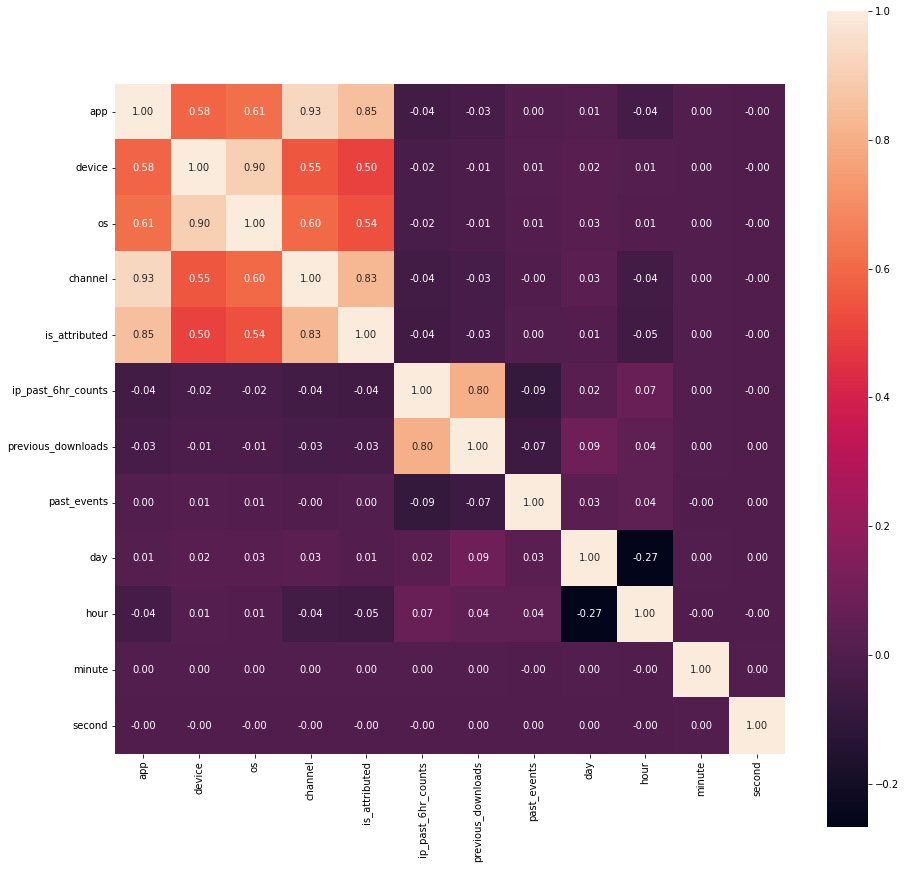

In [31]:
corr=data.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, square = True,fmt='.2f' ,annot = True)

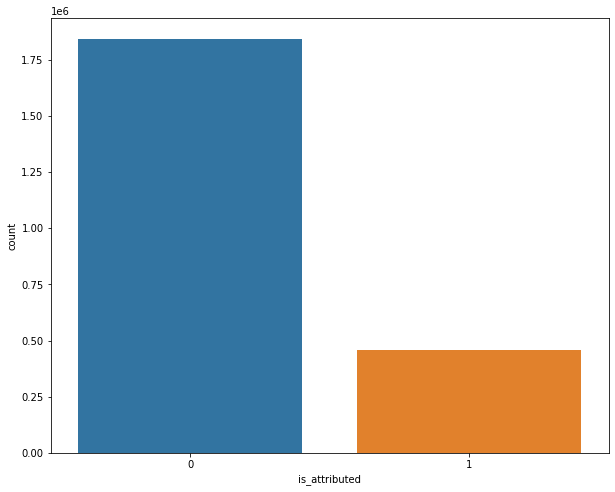

In [34]:
plt.figure(figsize = (10,8))
sns.countplot(x="is_attributed", data=data)

###make data balanced

In [76]:
features = data.drop(columns='is_attributed')
target = pd.DataFrame(data['is_attributed'])


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1840448, 11)
(460113, 11)
(1840448, 1)
(460113, 1)


In [ ]:
# sampler = NearMiss() 
# X_rs, y_rs = sampler.fit_resample(X_train, y_train)

In [ ]:
# sampler = NeighbourhoodCleaningRule() 
# X_rs1, y_rs1 = sampler.fit_resample(features, target)

In [ ]:
# # y_rs1.value_counts()
# sampling_strategy={1: 365264, 0: 457000}

In [38]:
y_train.value_counts()

is_attributed
0                1475184
1                 365264
dtype: int64

In [77]:
sampler = RandomUnderSampler()
X_rs, y_rs = sampler.fit_resample(X_train, y_train)

In [39]:
y_rs.value_counts()

is_attributed
1                365264
0                365264
dtype: int64

In [78]:
X_rs = X_rs.values
y_rs = y_rs.is_attributed.values

In [79]:
X_test = X_test.values

In [80]:
y_test = y_test.is_attributed.values

In [81]:
sc = StandardScaler()

X_rs = sc.fit_transform(X_rs)
X_test = sc.transform(X_test)

### Logistic Regression

In [84]:
classifier = LogisticRegression()
classifier.fit(X_rs,y_rs)
y_pred = classifier.predict(X_test)

lr_conf_matrix = confusion_matrix(y_test, y_pred)
lr_acc_score = accuracy_score(y_test, y_pred)
print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,y_pred))

confussion matrix
[[358898   9633]
 [ 14661  76921]]
-------------------------------------------
Accuracy of Logistic Regression: 94.71999269744606 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.97    368531
           1       0.89      0.84      0.86     91582

    accuracy                           0.95    460113
   macro avg       0.92      0.91      0.92    460113
weighted avg       0.95      0.95      0.95    460113



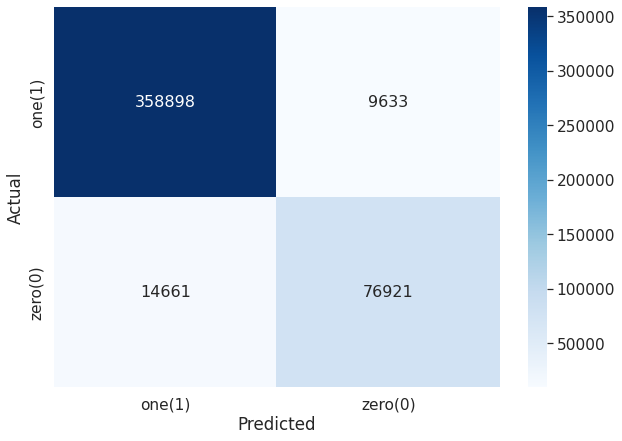

In [85]:
y_true = ['zero(0)','one(1)']
pred = ['zero(0)','one(1)']
data = lr_conf_matrix 
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues",fmt="d", annot=True,annot_kws={"size": 16})# font size
plt.show()

In [86]:
print(classifier.score(X_rs,y_rs)*100)

90.71849402076306


In [87]:
pred_prob1 = classifier.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)


roc_auc1 = auc(fpr1, tpr1)

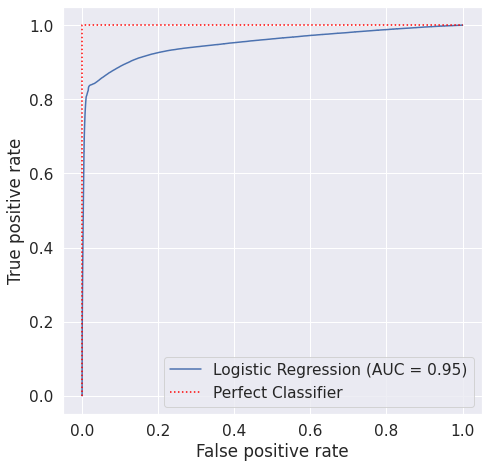

In [88]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
 
plt.plot(fpr1, tpr1, label='Logistic Regression (AUC = %0.2f)' % (roc_auc1))
  
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='red', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

In [89]:
roc_auc_score(y_test, y_pred)*100

90.68875216020241

#### 2 most important features

Feature: 0, Score: 2.13494
Feature: 1, Score: -0.20066
Feature: 2, Score: 0.14972
Feature: 3, Score: 1.11187
Feature: 4, Score: -0.10060
Feature: 5, Score: 0.07816
Feature: 6, Score: 0.03564
Feature: 7, Score: -0.07482
Feature: 8, Score: -0.11532
Feature: 9, Score: -0.01957
Feature: 10, Score: -0.00717


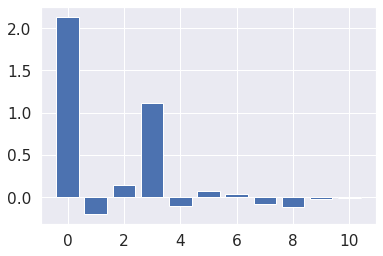

In [90]:
# get importance
importance = classifier.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [91]:
model = LogisticRegression()
model.fit(X_rs[:,[0,3]],y_rs)

LogisticRegression()

In [92]:
d = {'X_rs0': X_rs[:,0], 'X_rs3': X_rs[:,3], 'y_rs': y_rs}
new_df = pd.DataFrame(data=d)
new_df

,X_rs0,X_rs3,y_rs
0,-0.931800,-0.944544,0
1,-0.846827,-0.863898,0
2,-0.594866,-0.666073,0
3,-0.896392,-0.827212,0
4,-0.931800,-0.861623,0
...,...,...,...
730523,1.061719,1.238372,1
730524,0.956482,1.238372,1
730525,0.956482,1.238372,1
730526,-0.931800,-0.937017,1


In [63]:
sample = new_df.sample(100000)
sample

,X_rs0,X_rs3,y_rs
474279,-0.594831,-0.666559,1
528056,1.204140,1.247350,1
512583,0.956311,1.237909,1
177095,-0.846758,-0.857220,0
129372,-0.931720,-0.908533,0
...,...,...,...
219995,-0.535679,-0.281204,0
601836,1.312211,1.240209,1
285716,-0.907866,-0.945033,0
223004,-0.918429,-0.927833,0


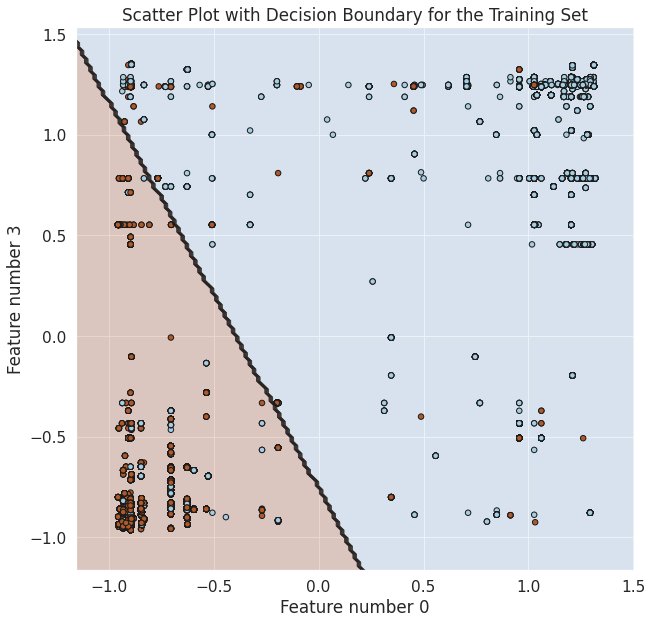

In [64]:
h = 0.02
x_min, x_max = sample.X_rs0.min() - 10*h, sample.X_rs0.max() + 10*h
y_min, y_max = sample.X_rs3.min() - 10*h, sample.X_rs3.max() + 10*h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z, cmap='Paired_r', alpha=0.25)
plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
plt.xlabel('Feature number 0')
plt.ylabel('Feature number 3')
plt.title('Scatter Plot with Decision Boundary for the Training Set')
plt.scatter(sample.X_rs0, sample.X_rs3, c=sample.y_rs.values, s=30, cmap='Paired_r', edgecolors='k');

In [65]:
d = {'X_t0': X_test[:,0], 'X_t3': X_test[:,3], 'y_t': y_test.is_attributed}
test = pd.DataFrame(data=d)
test

,X_t0,X_t3,y_t
633060,-0.925327,-0.914677,0
1297368,-0.907866,-0.910404,0
1381926,0.956311,-0.433111,1
1767728,-0.846758,-0.857220,0
2165285,1.209727,1.344560,1
...,...,...,...
2119756,-0.594831,-0.666559,0
1126141,-0.846758,-0.695291,0
631386,-0.918429,-0.932749,0
1326996,-0.846758,-0.861749,0


In [66]:
test_sample = test.sample(100000)
test_sample

,X_t0,X_t3,y_t
1300592,-0.846758,-0.857220,0
381148,-0.931720,-0.937507,0
1605151,-0.892730,-0.907320,0
891484,-0.892730,-0.937697,0
790756,-0.931720,-0.934097,0
...,...,...,...
1274244,-0.704459,-0.713364,0
813700,-0.594831,-0.858658,0
2054271,0.745827,-0.102645,1
1982606,-0.897247,-0.915924,0


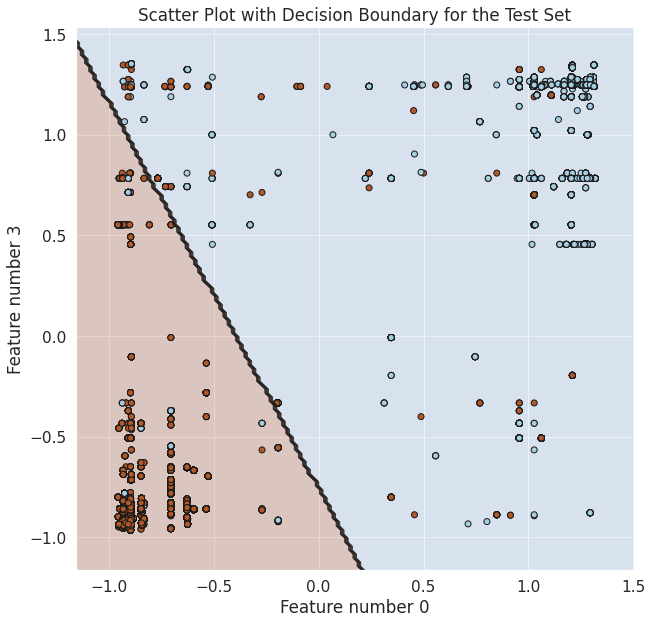

In [67]:
h = 0.02
x_min, x_max = test_sample.X_t0.min() - 10*h, test_sample.X_t0.max() + 10*h
y_min, y_max = test_sample.X_t3.min() - 10*h, test_sample.X_t3.max() + 10*h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z, cmap='Paired_r', alpha=0.25)
plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
plt.xlabel('Feature number 0')
plt.ylabel('Feature number 3')
plt.title('Scatter Plot with Decision Boundary for the Test Set')
plt.scatter(test_sample.X_t0, test_sample.X_t3, c=test_sample.y_t.values, cmap='Paired_r', edgecolors='k');

#### with class_weight

In [ ]:
X_train = X_train.values
y_train = y_train.is_attributed.values

In [94]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [95]:
classifier = LogisticRegression(class_weight='balanced')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

lr_conf_matrix = confusion_matrix(y_test, y_pred)
lr_acc_score = accuracy_score(y_test, y_pred)
print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,y_pred))

confussion matrix
[[362568   5963]
 [ 16050  75532]]
-------------------------------------------
Accuracy of Logistic Regression: 95.21574048114267 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    368531
           1       0.93      0.82      0.87     91582

    accuracy                           0.95    460113
   macro avg       0.94      0.90      0.92    460113
weighted avg       0.95      0.95      0.95    460113



In [96]:
pred_prob2 = classifier.predict_proba(X_test)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)


roc_auc2 = auc(fpr2, tpr2)

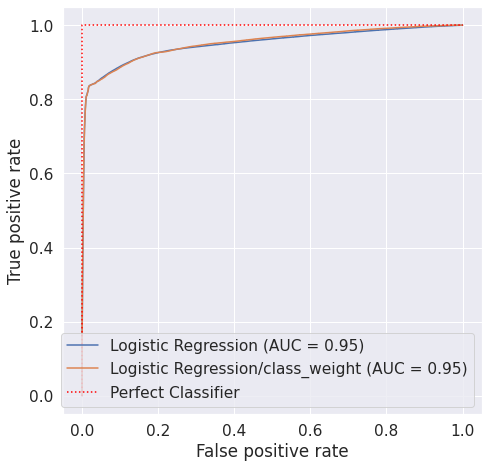

In [97]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
 
plt.plot(fpr1, tpr1, label='Logistic Regression (AUC = %0.2f)' % (roc_auc1))
plt.plot(fpr2, tpr2, label='Logistic Regression/class_weight (AUC = %0.2f)' % (roc_auc2))
  
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='red', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

### Decision Tree

In [77]:
data

,app,device,os,channel,is_attributed,ip_past_6hr_counts,previous_downloads,past_events,day,hour,minute,second
0,0.028329,0.152087,0.138712,0.034049,0,0.0,1.0,1309.0,6,15,13,23
1,0.995828,0.152087,0.138712,0.950244,1,0.0,1.0,1309.0,6,15,41,7
2,0.009261,0.152087,0.138712,0.019384,0,0.0,1.0,1309.0,6,15,42,32
3,0.028329,0.152087,0.138712,0.034049,0,0.0,1.0,1309.0,6,15,56,17
4,0.028329,0.152087,0.138712,0.034049,0,0.0,1.0,1309.0,6,15,57,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2300556,0.026755,0.152087,0.157243,0.016611,0,23.0,29.0,2820.0,9,15,59,59
2300557,0.026518,0.152087,0.138712,0.031812,0,70.0,14.0,22.0,9,15,59,59
2300558,0.011220,0.026726,0.109914,0.012445,0,62.0,80.0,78.0,9,16,0,0
2300559,0.011220,0.152087,0.090235,0.129124,0,9.0,11.0,1774.0,9,16,0,0


In [101]:
features = data.drop(columns='is_attributed')
target = pd.DataFrame(data['is_attributed'])


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1840448, 11)
(460113, 11)
(1840448, 1)
(460113, 1)


In [102]:
sampler = RandomUnderSampler()
X_rs, y_rs = sampler.fit_resample(X_train, y_train)

In [103]:
X_rs = X_rs.values
y_rs = y_rs.is_attributed.values

In [104]:
X_test = X_test.values
y_test = y_test.is_attributed.values

In [105]:
scaler = StandardScaler()

X_rs = scaler.fit_transform(X_rs)
X_test = scaler.transform(X_test)

In [109]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_rs,y_rs)
print(dt.score(X_test,y_test)*100)

pred_prob2 = dt.predict_proba(X_test)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

roc_auc2 = auc(fpr2, tpr2)

88.11118138370358


In [107]:
y_pred = dt.predict(X_test)

lr_conf_matrix = confusion_matrix(y_test, y_pred)
lr_acc_score = accuracy_score(y_test, y_pred)
print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Decision Tree:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,y_pred))

confussion matrix
[[323981  44550]
 [ 10152  81430]]
-------------------------------------------
Accuracy of Decision Tree: 88.11118138370358 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.88      0.92    368531
           1       0.65      0.89      0.75     91582

    accuracy                           0.88    460113
   macro avg       0.81      0.88      0.84    460113
weighted avg       0.91      0.88      0.89    460113



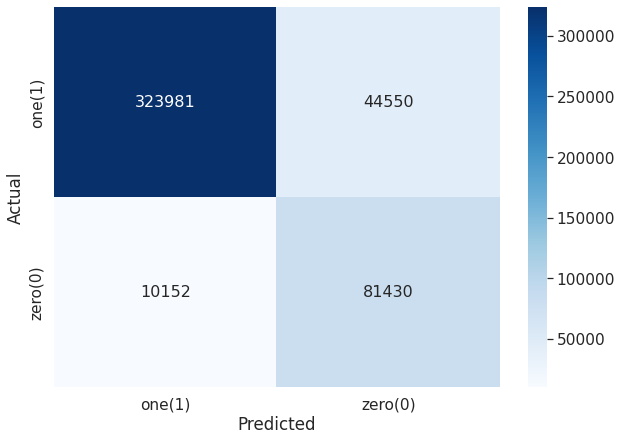

In [108]:
y_true = ['zero(0)','one(1)']
pred = ['zero(0)','one(1)']
data = lr_conf_matrix 
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues",fmt="d", annot=True,annot_kws={"size": 16})# font size
plt.show()

In [113]:
print(dt.score(X_test,y_test)*100)

88.11118138370358


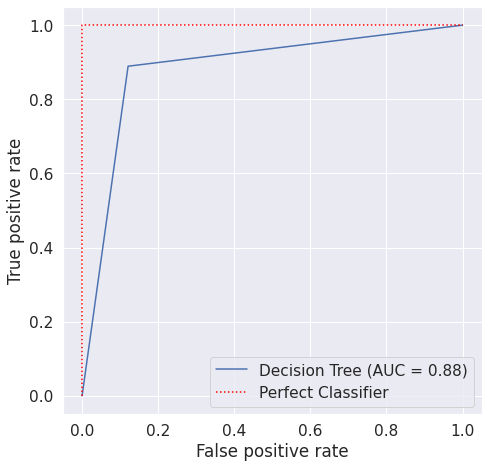

In [110]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
 
plt.plot(fpr2, tpr2, label='Decision Tree (AUC = %0.2f)' % (roc_auc2))
  
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='red', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

In [114]:
roc_auc_score(y_test, y_pred)*100

88.41315848536024

#### 2 most important features

Feature: 0, Score: 0.71349
Feature: 1, Score: 0.00322
Feature: 2, Score: 0.02466
Feature: 3, Score: 0.03664
Feature: 4, Score: 0.03918
Feature: 5, Score: 0.02118
Feature: 6, Score: 0.05146
Feature: 7, Score: 0.00997
Feature: 8, Score: 0.02460
Feature: 9, Score: 0.03758
Feature: 10, Score: 0.03803


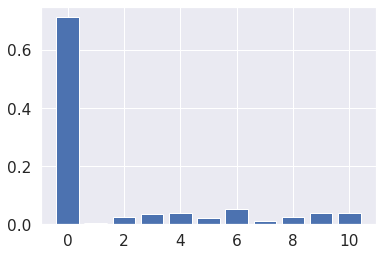

In [115]:
# get importance
importance = dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [118]:
dt.fit(X_rs[:,[0,6]],y_rs)

DecisionTreeClassifier(random_state=42)

In [119]:
d = {'X_rs0': X_rs[:,0], 'X_rs6': X_rs[:,6], 'y_rs': y_rs}
new_df = pd.DataFrame(data=d)
new_df

,X_rs0,X_rs6,y_rs
0,-0.595013,-0.169145,0
1,-0.892958,-0.180537,0
2,-0.527247,-0.070123,0
3,-0.892958,-0.317249,0
4,-0.908097,0.316711,0
...,...,...,...
730523,1.061610,-0.373098,1
730524,0.956370,-0.273049,1
730525,0.956370,-0.273049,1
730526,-0.931955,-0.273049,1


In [127]:
sample = new_df.sample(100000)
sample

,X_rs0,X_rs6,y_rs
723634,1.204237,-0.273049,1
398147,-0.846979,-0.250007,1
18091,-0.897086,0.253410,0
438323,1.027515,-0.273049,1
586868,1.312325,0.074811,1
...,...,...,...
183736,-0.931955,-0.273563,0
646356,-0.908097,-0.377895,1
304821,-0.937612,-0.268081,0
533470,-0.908097,-0.273049,1


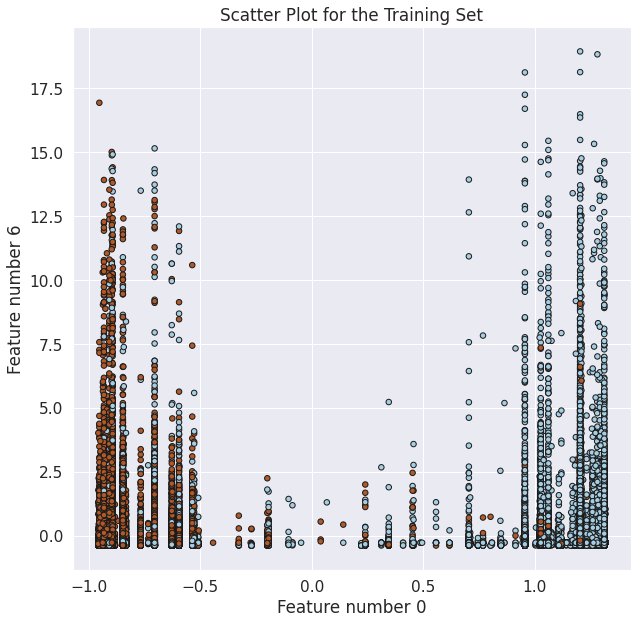

In [132]:
plt.figure(figsize=(10,10))
plt.xlabel('Feature number 0')
plt.ylabel('Feature number 6')
plt.title('Scatter Plot for the Training Set')
plt.scatter(sample.X_rs0, sample.X_rs6, c=sample.y_rs.values, s=30, cmap='Paired_r', edgecolors='k');

In [134]:
d = {'X_t0': X_test[:,0], 'X_t6': X_test[:,6], 'y_t': y_test}
test = pd.DataFrame(data=d)
test

,X_t0,X_t6,y_t
0,-0.925560,-0.385005,0
1,-0.908097,0.351746,0
2,0.956370,0.984764,1
3,-0.846979,0.482375,0
4,1.209825,2.485505,1
...,...,...,...
460108,-0.595013,-0.131284,0
460109,-0.846979,-0.273049,0
460110,-0.918661,-0.379180,0
460111,-0.846979,-0.208719,0


In [135]:
test_sample = test.sample(100000)
test_sample

,X_t0,X_t6,y_t
72952,-0.892958,-0.115779,0
5230,1.209825,-0.273049,1
59438,-0.595013,-0.381407,0
257548,-0.936419,-0.369415,0
377640,-0.892958,-0.284870,0
...,...,...,...
287960,1.312325,-0.273049,1
221401,-0.908097,-0.014274,0
232488,-0.897086,2.467345,0
3533,0.345653,-0.266967,0


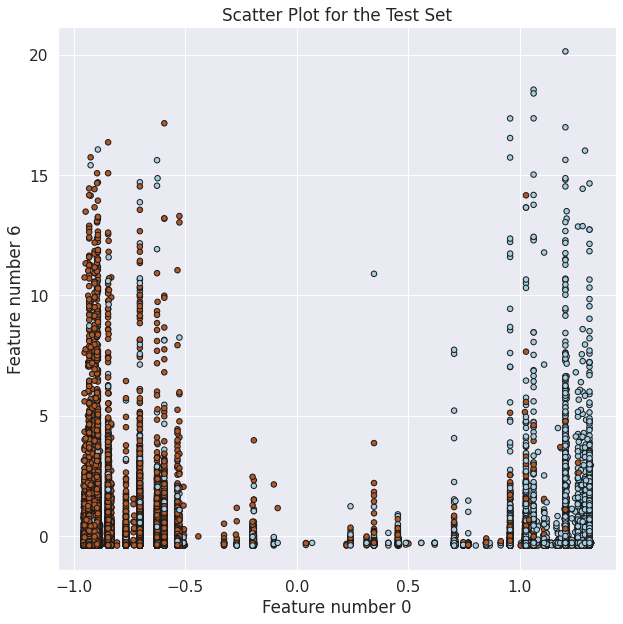

In [136]:
plt.figure(figsize=(10,10))
plt.xlabel('Feature number 0')
plt.ylabel('Feature number 6')
plt.title('Scatter Plot for the Test Set')
plt.scatter(test_sample.X_t0, test_sample.X_t6, c=test_sample.y_t.values, s=30, cmap='Paired_r', edgecolors='k');

#### with class_weight

In [139]:
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

lr_conf_matrix = confusion_matrix(y_test, y_pred)
lr_acc_score = accuracy_score(y_test, y_pred)
print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Decision Tree:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


confussion matrix
[[354615  13916]
 [ 24176  67406]]
-------------------------------------------
Accuracy of Decision Tree: 91.72116414880692 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95    368531
           1       0.83      0.74      0.78     91582

    accuracy                           0.92    460113
   macro avg       0.88      0.85      0.86    460113
weighted avg       0.91      0.92      0.92    460113



In [140]:
pred_prob1 = dt.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

roc_auc1 = auc(fpr1, tpr1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


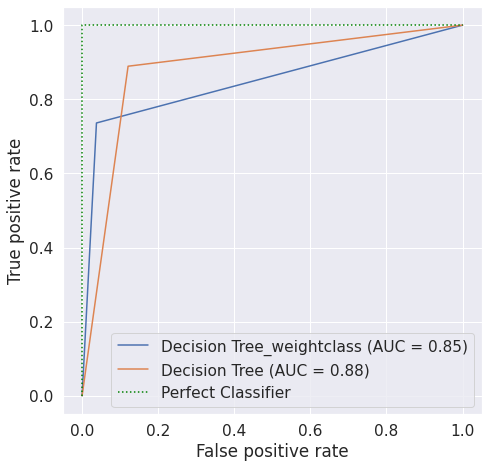

In [141]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
 
plt.plot(fpr1, tpr1, label='Decision Tree_weightclass (AUC = %0.2f)' % (roc_auc1))
plt.plot(fpr2, tpr2, label='Decision Tree (AUC = %0.2f)' % (roc_auc2))
#plt.plot(fpr3, tpr3, label='Decision Tree3 (AUC = %0.2f)' % (roc_auc3))
# plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

### Random Forest

In [142]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_rs,y_rs)
print(rf.score(X_test,y_test)*100)

94.75650546713524


In [143]:
y_pred = rf.predict(X_test)

lr_conf_matrix = confusion_matrix(y_test, y_pred)
lr_acc_score = accuracy_score(y_test, y_pred)
print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Random Forest:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,y_pred))

confussion matrix
[[354343  14188]
 [  9938  81644]]
-------------------------------------------
Accuracy of Random Forest: 94.75650546713524 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.96      0.97    368531
           1       0.85      0.89      0.87     91582

    accuracy                           0.95    460113
   macro avg       0.91      0.93      0.92    460113
weighted avg       0.95      0.95      0.95    460113



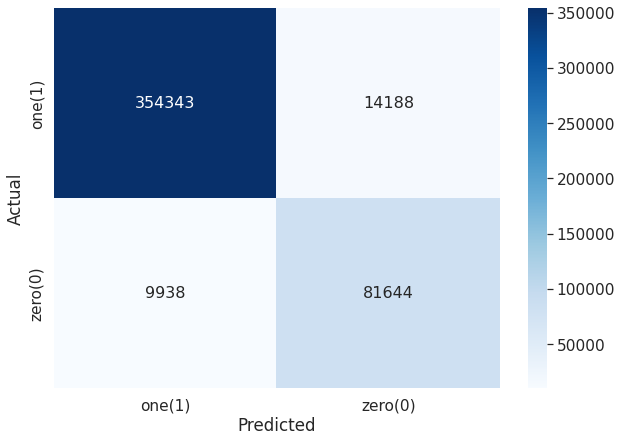

In [144]:
y_true = ['zero(0)','one(1)']
pred = ['zero(0)','one(1)']
data = lr_conf_matrix 
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues",fmt="d", annot=True,annot_kws={"size": 16})# font size
plt.show()

In [145]:
pred_prob1 = rf.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

roc_auc1 = auc(fpr1, tpr1)

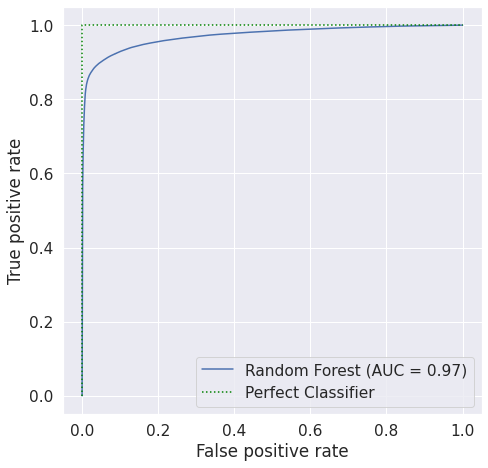

In [146]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
 
plt.plot(fpr1, tpr1, label='Random Forest (AUC = %0.2f)' % (roc_auc1))

# plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

#### 2 most important features

Feature: 0, Score: 0.30313
Feature: 1, Score: 0.02627
Feature: 2, Score: 0.07174
Feature: 3, Score: 0.34278
Feature: 4, Score: 0.05991
Feature: 5, Score: 0.02936
Feature: 6, Score: 0.05509
Feature: 7, Score: 0.01037
Feature: 8, Score: 0.02773
Feature: 9, Score: 0.03680
Feature: 10, Score: 0.03681


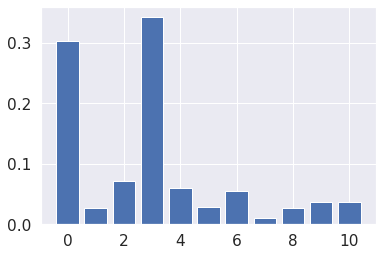

In [147]:
# get importance
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [148]:
rf.fit(X_rs[:,[0,3]],y_rs)

RandomForestClassifier(random_state=42)

In [149]:
d = {'X_rs0': X_rs[:,0], 'X_rs3': X_rs[:,3], 'y_rs': y_rs}
new_df = pd.DataFrame(data=d)
new_df

,X_rs0,X_rs3,y_rs
0,-0.595013,-0.666553,0
1,-0.892958,-0.907317,0
2,-0.527247,-0.695285,0
3,-0.892958,-0.907317,0
4,-0.908097,-0.902574,0
...,...,...,...
730523,1.061610,1.237943,1
730524,0.956370,1.237943,1
730525,0.956370,1.237943,1
730526,-0.931955,-0.937504,1


In [161]:
sample = new_df.sample(100000)
sample

,X_rs0,X_rs3,y_rs
94128,-0.892958,-0.686795,0
178834,-0.931955,-0.934094,0
192524,-0.897086,-0.828858,0
593153,1.312325,1.346276,1
346171,-0.892958,-0.902725,0
...,...,...,...
718262,1.027515,1.247384,1
234254,-0.931955,-0.862109,0
191802,-0.897086,-0.714123,0
324087,-0.908097,-0.945031,0


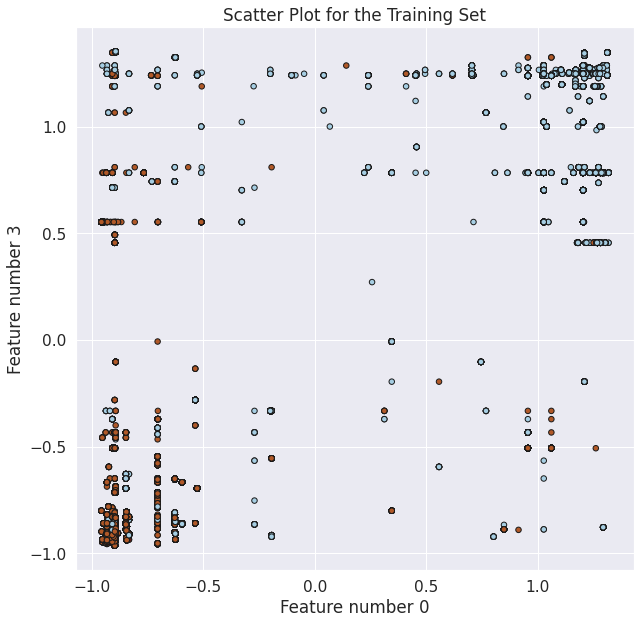

In [154]:
plt.figure(figsize=(10,10))
plt.xlabel('Feature number 0')
plt.ylabel('Feature number 3')
plt.title('Scatter Plot for the Training Set')
plt.scatter(sample.X_rs0, sample.X_rs3, c=sample.y_rs.values, s=30, cmap='Paired_r', edgecolors='k');

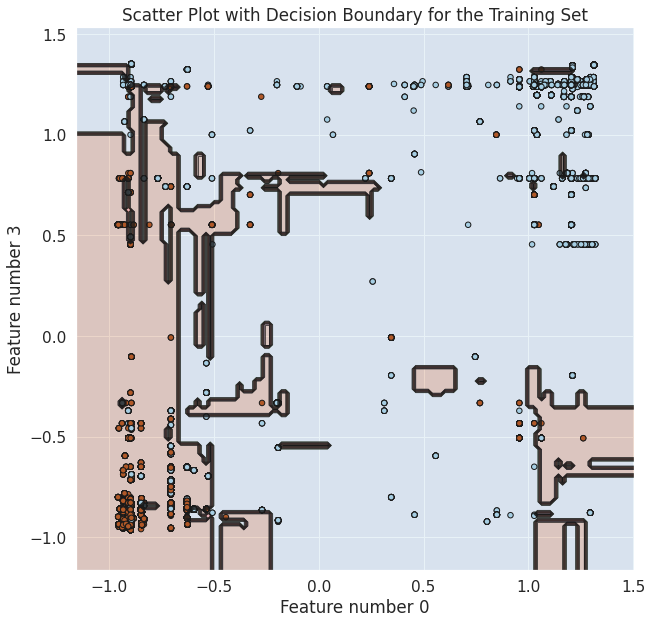

In [162]:
h = 0.02
x_min, x_max = sample.X_rs0.min() - 10*h, sample.X_rs0.max() + 10*h
y_min, y_max = sample.X_rs3.min() - 10*h, sample.X_rs3.max() + 10*h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z, cmap='Paired_r', alpha=0.25)
plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
plt.xlabel('Feature number 0')
plt.ylabel('Feature number 3')
plt.title('Scatter Plot with Decision Boundary for the Training Set')
plt.scatter(sample.X_rs0, sample.X_rs3, c=sample.y_rs.values, s=30, cmap='Paired_r', edgecolors='k');

In [155]:
d = {'X_t0': X_test[:,0], 'X_t3': X_test[:,3], 'y_t': y_test}
test = pd.DataFrame(data=d)
test

,X_t0,X_t3,y_t
0,-0.925560,-0.914675,0
1,-0.908097,-0.910401,0
2,0.956370,-0.433101,1
3,-0.846979,-0.857217,0
4,1.209825,1.344596,1
...,...,...,...
460108,-0.595013,-0.666553,0
460109,-0.846979,-0.695285,0
460110,-0.918661,-0.932746,0
460111,-0.846979,-0.861746,0


In [156]:
test_sample = test.sample(100000)
test_sample

,X_t0,X_t3,y_t
288705,-0.846979,-0.864383,0
255913,-0.833094,-0.907317,0
68835,1.061610,1.237943,1
161350,-0.931955,-0.937504,0
426691,-0.931955,-0.934094,0
...,...,...,...
413598,-0.892958,-0.907317,0
96241,-0.908097,-0.913823,0
226781,-0.892958,-0.911975,0
254395,-0.931955,-0.937504,0


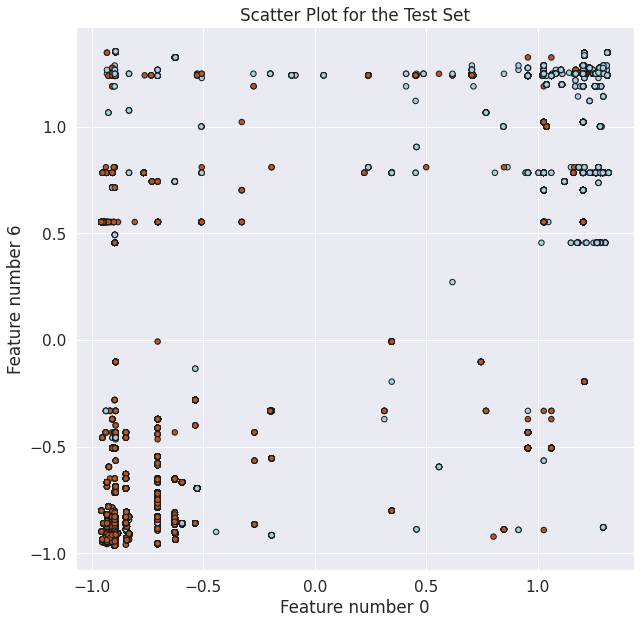

In [157]:
plt.figure(figsize=(10,10))
plt.xlabel('Feature number 0')
plt.ylabel('Feature number 6')
plt.title('Scatter Plot for the Test Set')
plt.scatter(test_sample.X_t0, test_sample.X_t3, c=test_sample.y_t.values, s=30, cmap='Paired_r', edgecolors='k');

#### with class_weight

In [163]:
rf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

lr_conf_matrix = confusion_matrix(y_test, y_pred)
lr_acc_score = accuracy_score(y_test, y_pred)
print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Random Forest:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


confussion matrix
[[354615  13916]
 [ 24176  67406]]
-------------------------------------------
Accuracy of Decision Tree: 91.72116414880692 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95    368531
           1       0.83      0.74      0.78     91582

    accuracy                           0.92    460113
   macro avg       0.88      0.85      0.86    460113
weighted avg       0.91      0.92      0.92    460113



In [164]:
pred_prob2 = rf.predict_proba(X_test)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

roc_auc2 = auc(fpr2, tpr2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


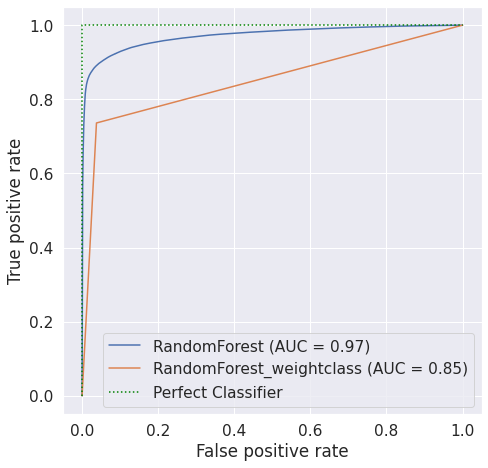

In [165]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
 
plt.plot(fpr1, tpr1, label='RandomForest (AUC = %0.2f)' % (roc_auc1))
plt.plot(fpr2, tpr2, label='RandomForest_weightclass (AUC = %0.2f)' % (roc_auc2))
#plt.plot(fpr3, tpr3, label='Decision Tree3 (AUC = %0.2f)' % (roc_auc3))
# plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

### KNN

In [20]:
knn = KNeighborsClassifier()
knn.fit(X_rs, y_rs) 

predicted = knn.predict(X_test)
print(knn.score(X_test,y_test)*100)
print("Predictions from the classifier:")
print(predicted)
print("Target values:")
print(y_test)

92.96672773862072
Predictions from the classifier:
[0 0 1 ... 0 0 0]
Target values:
[0 0 1 ... 0 0 0]


In [23]:
lr_conf_matrix = confusion_matrix(y_test, predicted)
lr_acc_score = accuracy_score(y_test, predicted)
print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of KNN:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,predicted))

confussion matrix
[[348626  19905]
 [ 12456  79126]]
-------------------------------------------
Accuracy of KNN: 92.96672773862072 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.95      0.96    368531
           1       0.80      0.86      0.83     91582

    accuracy                           0.93    460113
   macro avg       0.88      0.90      0.89    460113
weighted avg       0.93      0.93      0.93    460113



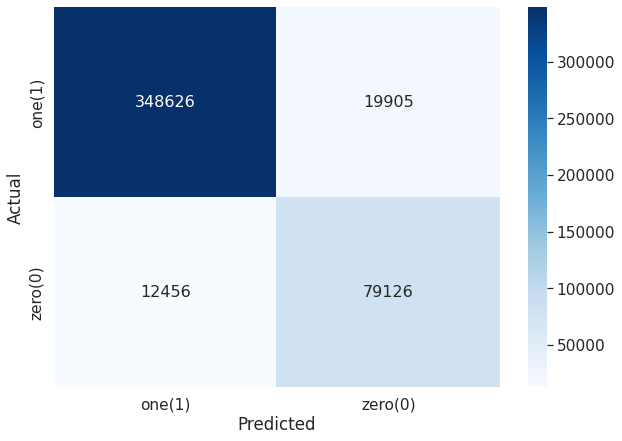

In [24]:
y_true = ['zero(0)','one(1)']
pred = ['zero(0)','one(1)']
data = lr_conf_matrix 
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues",fmt="d", annot=True,annot_kws={"size": 16})# font size
plt.show()

In [ ]:
pred_prob1 = knn.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

In [26]:
roc_auc1 = auc(fpr1, tpr1)

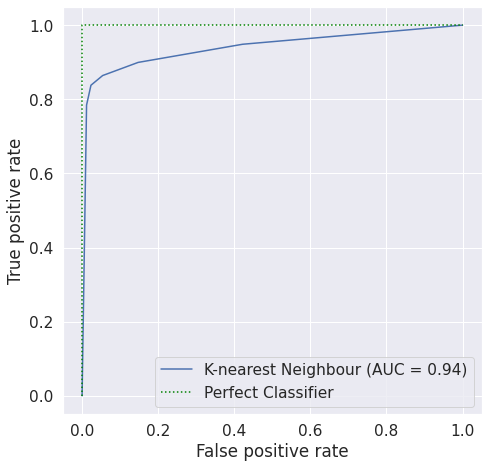

In [27]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
 
plt.plot(fpr1, tpr1, label='K-nearest Neighbour (AUC = %0.2f)' % (roc_auc1))

# plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

In [48]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

#### 2 most important features

Feature: 0, Score: 0.17200
Feature: 1, Score: 0.02540
Feature: 2, Score: 0.00200
Feature: 3, Score: 0.10160
Feature: 4, Score: 0.00120
Feature: 5, Score: 0.00040
Feature: 6, Score: 0.00620
Feature: 7, Score: 0.00420
Feature: 8, Score: 0.00500
Feature: 9, Score: 0.00180
Feature: 10, Score: 0.00360


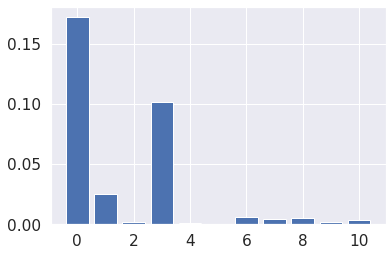

In [33]:
results = permutation_importance(knn, X_test[2000:3000], y_test[2000:3000], scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [34]:
knn.fit(X_rs[:,[0,3]],y_rs)

KNeighborsClassifier()

In [35]:
d = {'X_rs0': X_rs[:,0], 'X_rs3': X_rs[:,3], 'y_rs': y_rs}
new_df = pd.DataFrame(data=d)
new_df

,X_rs0,X_rs3,y_rs
0,-0.896599,-0.863600,0
1,-0.908150,-0.944860,0
2,-0.932007,-0.861938,0
3,-0.527312,-0.695116,0
4,-0.893012,-0.713189,0
...,...,...,...
730523,1.061496,1.238092,1
730524,0.956259,1.238092,1
730525,0.956259,1.238092,1
730526,-0.932007,-0.937333,1


In [36]:
sample = new_df.sample(100000)
sample

,X_rs0,X_rs3,y_rs
489842,1.061496,1.238092,1
669422,-0.893012,-0.905986,1
491001,1.312203,1.240391,1
168280,-0.932007,-0.933923,0
486450,-0.893012,-0.907146,1
...,...,...,...
481811,1.312203,1.240391,1
378960,0.704935,1.247533,1
394078,-0.704718,-0.719111,1
513131,1.204119,1.021283,1


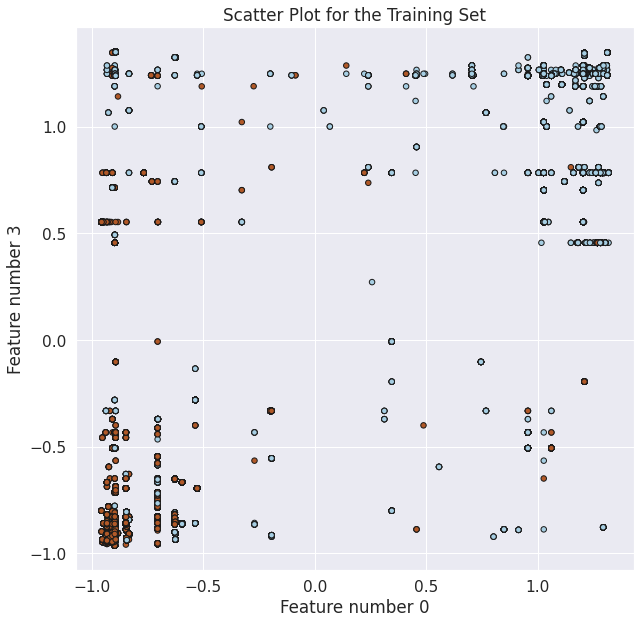

In [37]:
plt.figure(figsize=(10,10))
plt.xlabel('Feature number 0')
plt.ylabel('Feature number 3')
plt.title('Scatter Plot for the Training Set')
plt.scatter(sample.X_rs0, sample.X_rs3, c=sample.y_rs.values, s=30, cmap='Paired_r', edgecolors='k');

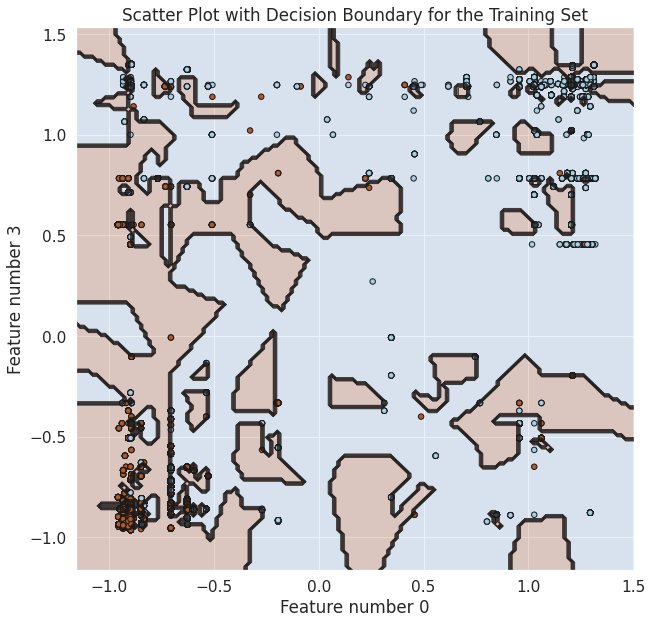

In [39]:
h = 0.02
x_min, x_max = sample.X_rs0.min() - 10*h, sample.X_rs0.max() + 10*h
y_min, y_max = sample.X_rs3.min() - 10*h, sample.X_rs3.max() + 10*h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z, cmap='Paired_r', alpha=0.25)
plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
plt.xlabel('Feature number 0')
plt.ylabel('Feature number 3')
plt.title('Scatter Plot with Decision Boundary for the Training Set')
plt.scatter(sample.X_rs0, sample.X_rs3, c=sample.y_rs.values, s=30, cmap='Paired_r', edgecolors='k');

In [40]:
d = {'X_t0': X_test[:,0], 'X_t3': X_test[:,3], 'y_t': y_test}
test = pd.DataFrame(data=d)
test

,X_t0,X_t3,y_t
0,-0.925613,-0.914504,0
1,-0.908150,-0.910230,0
2,0.956259,-0.432935,1
3,-0.847034,-0.857046,0
4,1.209707,1.344743,1
...,...,...,...
460108,-0.595076,-0.666385,0
460109,-0.847034,-0.695116,0
460110,-0.918714,-0.932575,0
460111,-0.847034,-0.861575,0


In [44]:
test_sample = test.sample(300000)
test_sample

,X_t0,X_t3,y_t
457430,-0.847034,-0.857046,0
306376,-0.952709,-0.934160,0
208043,-0.918714,-0.863600,0
212295,1.027402,1.247533,1
88593,1.292112,0.783588,1
...,...,...,...
264963,1.312203,1.240391,1
17180,-0.932007,-0.817911,0
46072,-0.947951,-0.858484,0
358531,-0.893012,-0.883925,0


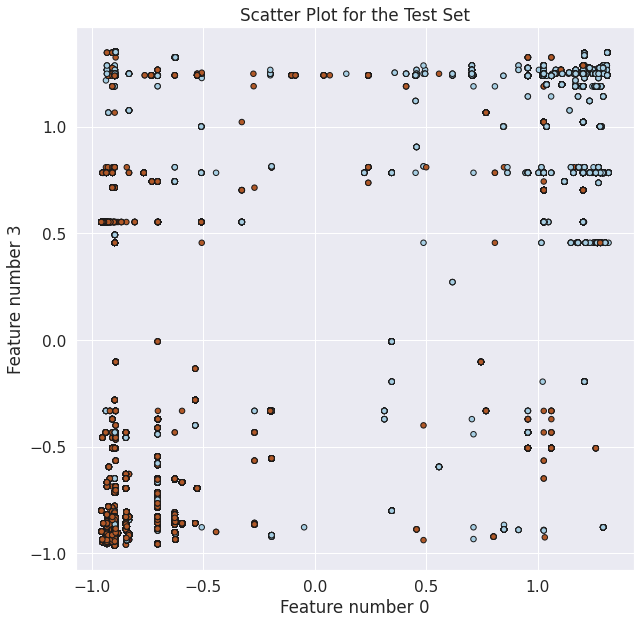

In [45]:
plt.figure(figsize=(10,10))
plt.xlabel('Feature number 0')
plt.ylabel('Feature number 3')
plt.title('Scatter Plot for the Test Set')
plt.scatter(test_sample.X_t0, test_sample.X_t3, c=test_sample.y_t.values, s=30, cmap='Paired_r', edgecolors='k');

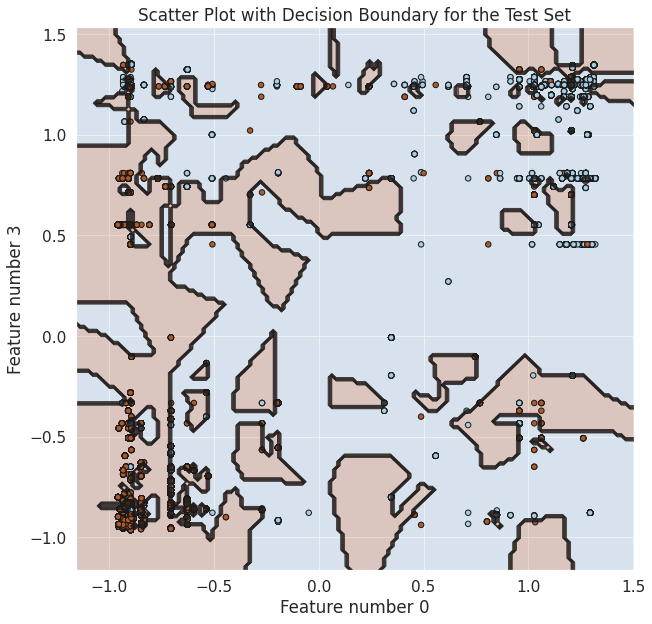

In [47]:
h = 0.02
x_min, x_max = test_sample.X_t0.min() - 10*h, test_sample.X_t0.max() + 10*h
y_min, y_max = test_sample.X_t3.min() - 10*h, test_sample.X_t3.max() + 10*h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z, cmap='Paired_r', alpha=0.25)
plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
plt.xlabel('Feature number 0')
plt.ylabel('Feature number 3')
plt.title('Scatter Plot with Decision Boundary for the Test Set')
plt.scatter(test_sample.X_t0, test_sample.X_t3, c=test_sample.y_t, s=30, cmap='Paired_r', edgecolors='k');

### SVM

In [60]:
data

,app,device,os,channel,is_attributed,ip_past_6hr_counts,previous_downloads,past_events,day,hour,minute,second
0,0.028329,0.152087,0.138712,0.034049,0,0.0,1.0,1309.0,6,15,13,23
1,0.995828,0.152087,0.138712,0.950244,1,0.0,1.0,1309.0,6,15,41,7
2,0.009261,0.152087,0.138712,0.019384,0,0.0,1.0,1309.0,6,15,42,32
3,0.028329,0.152087,0.138712,0.034049,0,0.0,1.0,1309.0,6,15,56,17
4,0.028329,0.152087,0.138712,0.034049,0,0.0,1.0,1309.0,6,15,57,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2300556,0.026755,0.152087,0.157243,0.016611,0,23.0,29.0,2820.0,9,15,59,59
2300557,0.026518,0.152087,0.138712,0.031812,0,70.0,14.0,22.0,9,15,59,59
2300558,0.011220,0.026726,0.109914,0.012445,0,62.0,80.0,78.0,9,16,0,0
2300559,0.011220,0.152087,0.090235,0.129124,0,9.0,11.0,1774.0,9,16,0,0


In [20]:
features = data.drop(columns='is_attributed')
target = pd.DataFrame(data['is_attributed'])


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1840448, 11)
(460113, 11)
(1840448, 1)
(460113, 1)


In [23]:
sampler = RandomUnderSampler(sampling_strategy={1: 5000, 0: 5000})
X_rs, y_rs = sampler.fit_resample(X_train, y_train)

In [24]:
X_rs = X_rs.values
y_rs = y_rs.is_attributed.values

In [25]:
X_test = X_test.values
y_test = y_test.is_attributed.values

In [26]:
sc = StandardScaler()

X_rs = sc.fit_transform(X_rs)
X_test = sc.transform(X_test)

In [27]:
SVM = SVC()
SVM.fit(X_rs , y_rs)
SVM.score(X_test, y_test)*100

95.14488832091247

In [31]:
y_pred = SVM.predict(X_test)

lr_conf_matrix = confusion_matrix(y_test, y_pred)
lr_acc_score = accuracy_score(y_test, y_pred)
print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of SVM:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,y_pred))

confussion matrix
[[361164   7367]
 [ 14972  76610]]
-------------------------------------------
Accuracy of SVM: 95.14488832091247 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    368531
           1       0.91      0.84      0.87     91582

    accuracy                           0.95    460113
   macro avg       0.94      0.91      0.92    460113
weighted avg       0.95      0.95      0.95    460113



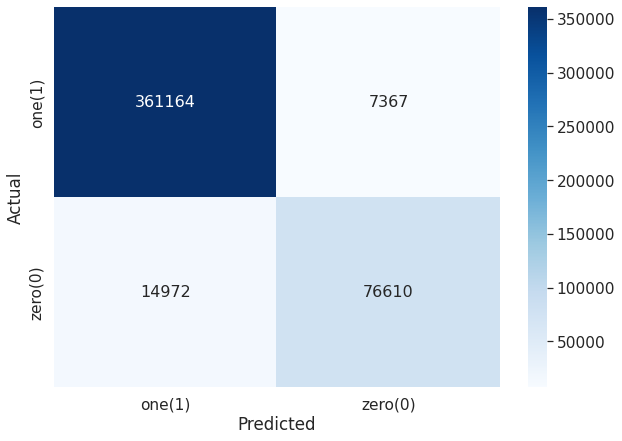

In [32]:
y_true = ['zero(0)','one(1)']
pred = ['zero(0)','one(1)']
data = lr_conf_matrix 
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues",fmt="d", annot=True,annot_kws={"size": 16})# font size
plt.show()

In [33]:
y_test_pred = SVM.decision_function(X_test) 

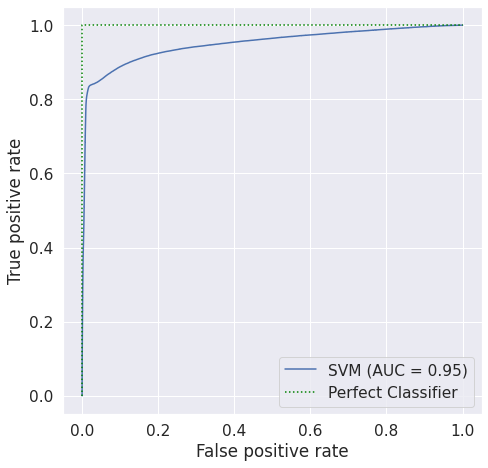

In [35]:
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
 
plt.plot(test_fpr, test_tpr, label='SVM (AUC = %0.2f)' % (auc(test_fpr, test_tpr)))

# plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

In [36]:
SVM.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

#### 2 most important features

In [37]:
svm = SVC(kernel='linear')
svm.fit(X_rs, y_rs)
svm.score(X_test, y_test)*100

95.21508846739822

Feature: 0, Score: 0.90729
Feature: 1, Score: -0.01880
Feature: 2, Score: -0.03847
Feature: 3, Score: 0.29635
Feature: 4, Score: -0.01093
Feature: 5, Score: 0.01564
Feature: 6, Score: -0.00265
Feature: 7, Score: -0.04187
Feature: 8, Score: -0.03942
Feature: 9, Score: -0.00457
Feature: 10, Score: -0.00537


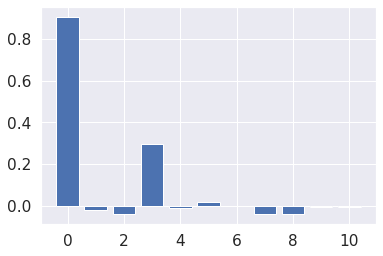

In [38]:
# get importance
importance = svm.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [39]:
svm.fit(X_rs[:,[0,3]],y_rs)

SVC(kernel='linear')

In [40]:
d = {'X_rs0': X_rs[:,0], 'X_rs3': X_rs[:,3], 'y_rs': y_rs}
new_df = pd.DataFrame(data=d)
new_df

,X_rs0,X_rs3,y_rs
0,-0.933059,-0.945428,0
1,-0.848223,-0.859742,0
2,-0.933059,-0.861176,0
3,-0.894126,-0.936874,0
4,-0.848223,-0.859742,0
...,...,...,...
9995,1.199633,0.546697,1
9996,1.307544,1.232406,1
9997,1.199633,1.239530,1
9998,1.199633,1.239530,1


In [41]:
sample = new_df.sample(5000)
sample

,X_rs0,X_rs3,y_rs
667,-0.897708,-0.896131,0
1107,-0.706135,-0.751041,0
8666,1.307544,1.232406,1
9659,-0.894126,1.343978,1
4090,-0.848223,-0.859742,0
...,...,...,...
364,-0.897708,-0.945588,0
5106,1.307544,1.232406,1
282,-0.894126,-0.909715,0
4823,-0.933059,-0.936424,0


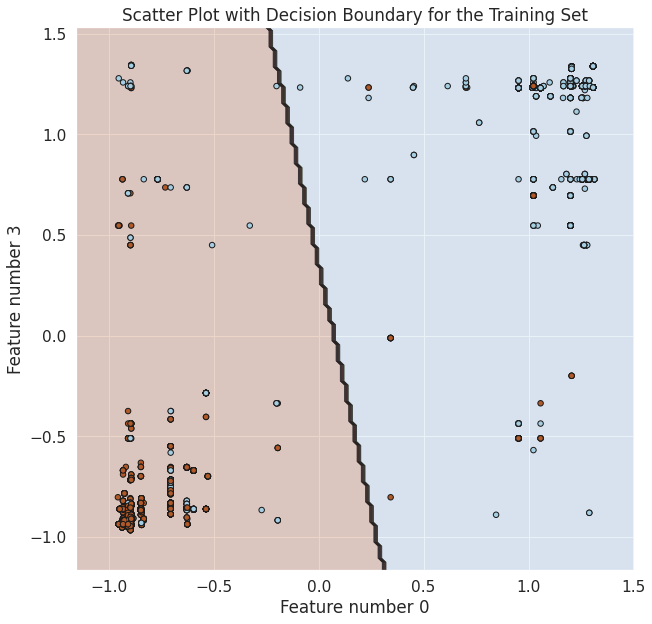

In [42]:
h = 0.02
x_min, x_max = sample.X_rs0.min() - 10*h, sample.X_rs0.max() + 10*h
y_min, y_max = sample.X_rs3.min() - 10*h, sample.X_rs3.max() + 10*h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z, cmap='Paired_r', alpha=0.25)
plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
plt.xlabel('Feature number 0')
plt.ylabel('Feature number 3')
plt.title('Scatter Plot with Decision Boundary for the Training Set')
plt.scatter(sample.X_rs0, sample.X_rs3, c=sample.y_rs.values, s=30, cmap='Paired_r', edgecolors='k');

In [43]:
d = {'X_t0': X_test[:,0], 'X_t3': X_test[:,3], 'y_t': y_test}
test = pd.DataFrame(data=d)
test

,X_t0,X_t3,y_t
0,-0.926675,-0.917054,0
1,-0.909240,-0.912791,0
2,0.952172,-0.436700,1
3,-0.848223,-0.859742,0
4,1.205212,1.336495,1
...,...,...,...
460108,-0.596669,-0.669561,0
460109,-0.848223,-0.698220,0
460110,-0.919787,-0.935080,0
460111,-0.848223,-0.864259,0


In [44]:
test_sample = test.sample(5000)
test_sample

,X_t0,X_t3,y_t
318296,-0.848223,-0.859742,0
140431,-0.956854,-0.899891,0
268077,-0.596669,-0.669561,0
11133,-0.894126,-0.903334,0
136046,-0.629249,-0.811431,0
...,...,...,...
30259,-0.898247,-0.912076,0
204113,-0.626857,-0.936661,0
185011,0.952172,1.230113,1
106178,-0.933059,-0.852515,0


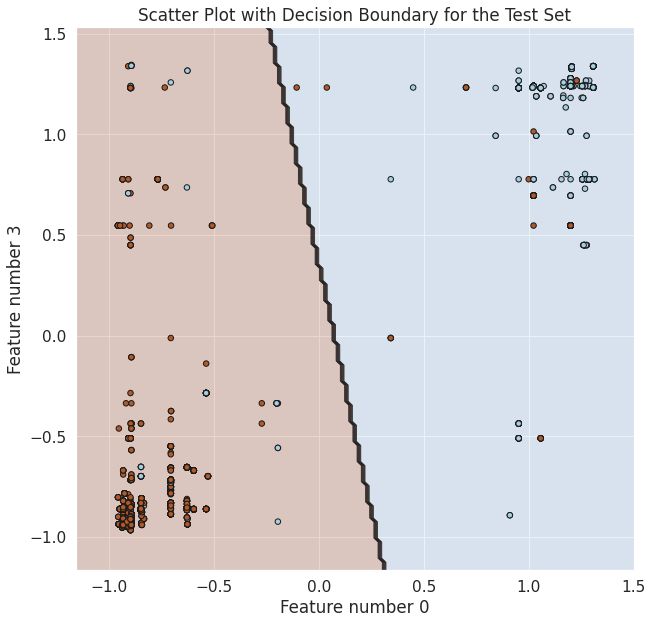

In [45]:
h = 0.02
x_min, x_max = test_sample.X_t0.min() - 10*h, test_sample.X_t0.max() + 10*h
y_min, y_max = test_sample.X_t3.min() - 10*h, test_sample.X_t3.max() + 10*h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z, cmap='Paired_r', alpha=0.25)
plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
plt.xlabel('Feature number 0')
plt.ylabel('Feature number 3')
plt.title('Scatter Plot with Decision Boundary for the Test Set')
plt.scatter(test_sample.X_t0, test_sample.X_t3, c=test_sample.y_t, s=30, cmap='Paired_r', edgecolors='k');

#### with class_weight

In [52]:
data

,app,device,os,channel,is_attributed,ip_past_6hr_counts,previous_downloads,past_events,day,hour,minute,second
0,0.028329,0.152087,0.138712,0.034049,0,0.0,1.0,1309.0,6,15,13,23
1,0.995828,0.152087,0.138712,0.950244,1,0.0,1.0,1309.0,6,15,41,7
2,0.009261,0.152087,0.138712,0.019384,0,0.0,1.0,1309.0,6,15,42,32
3,0.028329,0.152087,0.138712,0.034049,0,0.0,1.0,1309.0,6,15,56,17
4,0.028329,0.152087,0.138712,0.034049,0,0.0,1.0,1309.0,6,15,57,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2300556,0.026755,0.152087,0.157243,0.016611,0,23.0,29.0,2820.0,9,15,59,59
2300557,0.026518,0.152087,0.138712,0.031812,0,70.0,14.0,22.0,9,15,59,59
2300558,0.011220,0.026726,0.109914,0.012445,0,62.0,80.0,78.0,9,16,0,0
2300559,0.011220,0.152087,0.090235,0.129124,0,9.0,11.0,1774.0,9,16,0,0


In [53]:
data_sample = data.sample(10000)

In [54]:
features = data_sample.drop(columns='is_attributed')
target = pd.DataFrame(data_sample['is_attributed'])


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000, 1)
(2000, 1)


In [55]:
X_train = X_train.values
y_train = y_train.is_attributed.values

In [56]:
X_test = X_test.values
y_test = y_test.is_attributed.values

In [57]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [59]:
svm = SVC(kernel='linear', class_weight='balanced')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

lr_conf_matrix = confusion_matrix(y_test, y_pred)
lr_acc_score = accuracy_score(y_test, y_pred)
print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of SVM:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,y_pred))

confussion matrix
[[1569   23]
 [  65  343]]
-------------------------------------------
Accuracy of SVM: 95.6 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1592
           1       0.94      0.84      0.89       408

    accuracy                           0.96      2000
   macro avg       0.95      0.91      0.93      2000
weighted avg       0.96      0.96      0.96      2000



In [62]:
y_test_pred2 = svm.decision_function(X_test)

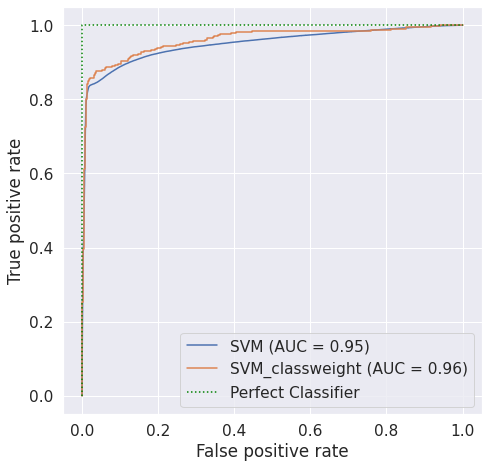

In [63]:
test_fpr2, test_tpr2, te_thresholds2 = roc_curve(y_test, y_test_pred2)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
 
plt.plot(test_fpr, test_tpr, label='SVM (AUC = %0.2f)' % (auc(test_fpr, test_tpr)))
plt.plot(test_fpr2, test_tpr2, label='SVM_classweight (AUC = %0.2f)' % (auc(test_fpr2, test_tpr2)))

# plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

### Naive Bayes

In [106]:
data

,app,device,os,channel,is_attributed,ip_past_6hr_counts,previous_downloads,past_events,day,hour,minute,second
0,0.028329,0.152087,0.138712,0.034049,0,0.0,1.0,1309.0,6,15,13,23
1,0.995828,0.152087,0.138712,0.950244,1,0.0,1.0,1309.0,6,15,41,7
2,0.009261,0.152087,0.138712,0.019384,0,0.0,1.0,1309.0,6,15,42,32
3,0.028329,0.152087,0.138712,0.034049,0,0.0,1.0,1309.0,6,15,56,17
4,0.028329,0.152087,0.138712,0.034049,0,0.0,1.0,1309.0,6,15,57,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2300556,0.026755,0.152087,0.157243,0.016611,0,23.0,29.0,2820.0,9,15,59,59
2300557,0.026518,0.152087,0.138712,0.031812,0,70.0,14.0,22.0,9,15,59,59
2300558,0.011220,0.026726,0.109914,0.012445,0,62.0,80.0,78.0,9,16,0,0
2300559,0.011220,0.152087,0.090235,0.129124,0,9.0,11.0,1774.0,9,16,0,0


In [107]:
features = data.drop(columns='is_attributed')
target = pd.DataFrame(data['is_attributed'])


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1840448, 11)
(460113, 11)
(1840448, 1)
(460113, 1)


In [108]:
X_train = X_train.values
y_train = y_train.is_attributed.values

In [109]:
X_test = X_test.values
y_test = y_test.is_attributed.values

In [110]:
#Create a Gaussian Classifier
nb = GaussianNB()

# Train the model using the training sets
nb.fit(X_train,y_train)

#Predict Output
predicted= nb.predict(X_test) 
print(nb.score(X_test,y_test)*100)
# print ("Predicted Value:", predicted)

94.63805630356022


In [111]:
y_pred = nb.predict(X_test)

lr_conf_matrix = confusion_matrix(y_test, y_pred)
lr_acc_score = accuracy_score(y_test, y_pred)
print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Naive Bayes:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,y_pred))

confussion matrix
[[361819   6712]
 [ 17959  73623]]
-------------------------------------------
Accuracy of Naive Bayes: 94.63805630356022 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.97    368531
           1       0.92      0.80      0.86     91582

    accuracy                           0.95    460113
   macro avg       0.93      0.89      0.91    460113
weighted avg       0.95      0.95      0.95    460113



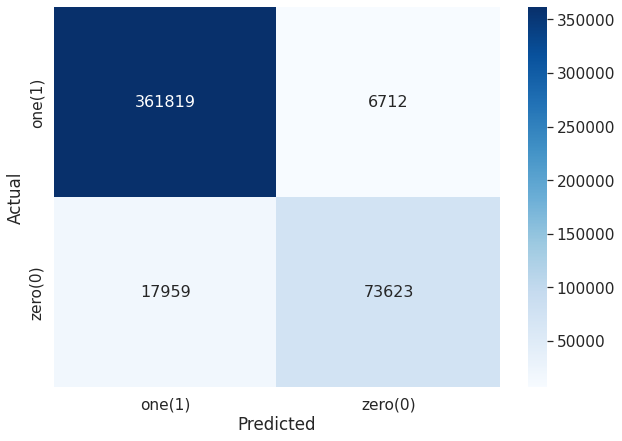

In [72]:
y_true = ['zero(0)','one(1)']
pred = ['zero(0)','one(1)']
data1 = lr_conf_matrix 
df_cm = pd.DataFrame(data1, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues",fmt="d", annot=True,annot_kws={"size": 16})# font size
plt.show()

In [73]:
pred_prob = nb.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)

In [74]:
roc_auc = auc(fpr, tpr)

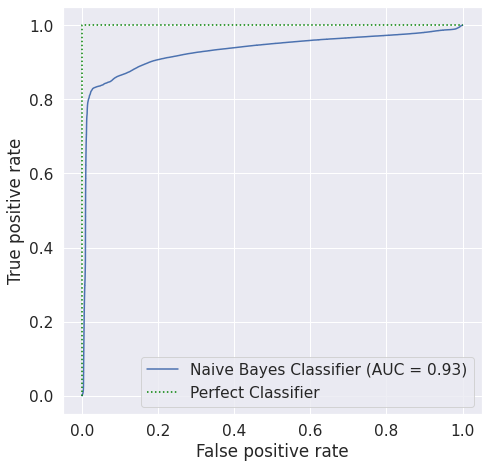

In [75]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
 

plt.plot(fpr, tpr, label='Naive Bayes Classifier (AUC = %0.2f)' % (roc_auc))
# plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()